## Alexander Sanabria Regresion Lineal

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [204]:
#cargando librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from  sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [205]:
Data = pd.read_csv('./CarDataSet/Car details v3.csv')

In [206]:
Data.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [207]:
Data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [208]:
Data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [209]:
Data = Data.dropna(axis=0)

In [210]:
Data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [211]:

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [212]:
Data = Data.drop(['seller_type','torque','name','owner','fuel','transmission'],axis=1)
Data.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,16.1 kmpl,1298 CC,88.2 bhp,5.0


Text(0.5, 1.0, 'Scatter Plot between km_driven and selling_price')

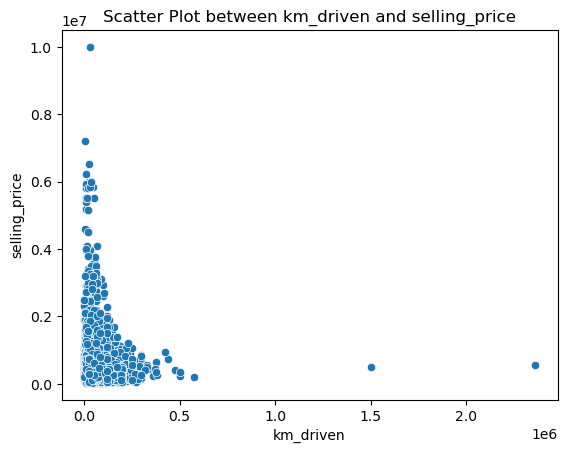

In [213]:

    sns.scatterplot(data=Data, x='km_driven', y='selling_price')
    plt.title(f"Scatter Plot between km_driven and selling_price")
  

In [214]:

def convertToNumber(s:str):
    d = ""
    for i in list(s):
        if i.isdigit():
            d += i
    return eval(d)


Data["mileage"] = Data["mileage"].apply(convertToNumber)
Data["engine"] = Data["engine"].apply(convertToNumber)
Data["max_power"] = Data["max_power"].apply(convertToNumber)

In [215]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   mileage        7906 non-null   int64  
 4   engine         7906 non-null   int64  
 5   max_power      7906 non-null   int64  
 6   seats          7906 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 494.1 KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características



Característica de interes:

    selling_price  : es el valor de el auto en base a sus caracteristicas
    Predecir el precio de un auto en base a sus caracteristicas



In [216]:
Data['selling_price'].value_counts()

selling_price
300000    221
600000    211
350000    204
550000    204
450000    194
         ... 
67500       1
66000       1
312000      1
298000      1
746000      1
Name: count, Length: 670, dtype: int64

In [217]:
Data[['selling_price']].head(20)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [218]:
X = Data.drop('selling_price',axis=1) 
Y = Data['selling_price'] 

In [219]:
X

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,234,1248,74,5.0
1,2014,120000,2114,1498,10352,5.0
2,2006,140000,177,1497,78,5.0
3,2010,127000,230,1396,90,5.0
4,2007,120000,161,1298,882,5.0
...,...,...,...,...,...,...
8123,2013,110000,185,1197,8285,5.0
8124,2007,119000,168,1493,110,5.0
8125,2009,120000,193,1248,739,5.0
8126,2013,25000,2357,1396,70,5.0


In [220]:
Y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64

In [248]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Data.drop('selling_price',axis=1) 
Y = Data['km_driven'] 


#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [249]:
print (X_train)

      year  km_driven  mileage  engine  max_power  seats
1075  2016      94000     1136    2755       1715    7.0
3139  2015      90000      258    1498        986    5.0
1682  2015      20000      204    1248        917    5.0
5555  2018      50000     2163     998         67    5.0
6571  2016      11000      143    1598       1035    5.0
...    ...        ...      ...     ...        ...    ...
5074  2011     105000      170    1497        118    5.0
3367  2016      38000      186    1197       8183    5.0
1703  2015      35000      173    1497       1173    7.0
2694  2013     173000     1205    2179        120    7.0
2821  2007     100000      161    1405         70    5.0

[5929 rows x 6 columns]


In [250]:
print (Y_train)

1075     94000
3139     90000
1682     20000
5555     50000
6571     11000
         ...  
5074    105000
3367     38000
1703     35000
2694    173000
2821    100000
Name: km_driven, Length: 5929, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [251]:

modelo_regresion = LinearRegression() 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) 

In [252]:
print (Y_test)

4048     38000
4831      7032
5123    110000
6505     70000
46       10300
         ...  
7345    114000
6569      8500
3627     10000
6038     70000
1860     17000
Name: km_driven, Length: 1977, dtype: int64


In [253]:
print (Prediccion)

[ 38000.   7032. 110000. ...  10000.  70000.  17000.]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [254]:
modelo_regresion.coef_

array([-2.85407252e-12,  1.00000000e+00,  5.18682319e-16, -5.19116000e-16,
        3.46944695e-17,  3.16940001e-13])

In [255]:
pd.DataFrame(modelo_regresion.coef_, X.columns, columns=['Coeficients'])

,Coeficients
year,-2.854073e-12
km_driven,1.000000e+00
mileage,5.186823e-16
engine,-5.191160e-16
max_power,3.469447e-17
seats,3.169400e-13


In [256]:
MAE= metrics.mean_absolute_error(Y_test, Prediccion)
MSE=metrics.mean_squared_error(Y_test, Prediccion)
RMSE= np.sqrt(MSE)

In [257]:
MAE

1.8486215873991437e-11

In [258]:
MSE

6.421343119947722e-22

In [259]:
RMSE

2.5340369215833697e-11

In [261]:
Data['km_driven'].mean()

69188.65975208703

## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [264]:
test_residual= Y_test - Prediccion

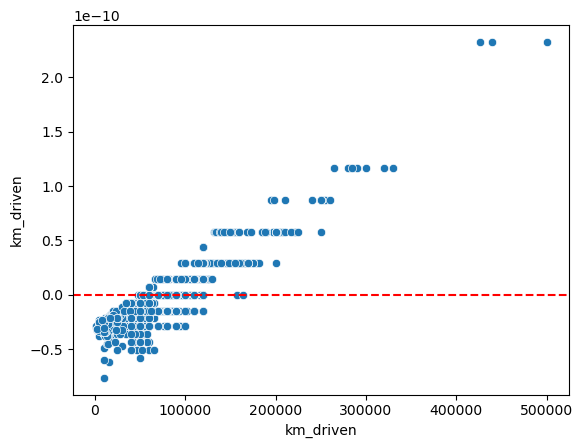

In [266]:
sns.scatterplot(x=Y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

Text(0, 0.5, 'Prediccion')

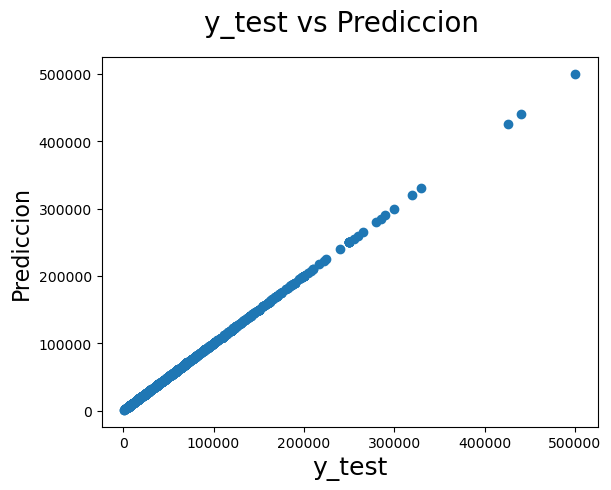

In [269]:
fig = plt.figure()
plt.scatter(Y_test,Prediccion)
fig.suptitle('y_test vs Prediccion', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('Prediccion', fontsize=16)  

## 8. Interpretar, analizar y documentar los resultados obtenidos


    MAE (Mean Absolute Error - Error Absoluto Medio): Este valor, 1.8486215873991437e-11, indica el promedio de los valores absolutos de los errores entre las predicciones del modelo y los valores reales del conjunto de datos. Dado que es un número muy cercano a cerosugiere que el modelo tiene una precisión muy alta, ya que el error absoluto medio es extremadamente pequeño.

    MSE (Mean Squared Error - Error Cuadrático Medio): El MSE, con un valor de 6.421343119947722e-22, representa el promedio de los cuadrados de los errores entre las predicciones y los valores reales. Al ser un valor cercano a cero  indica que las predicciones del modelo son muy precisas y están muy cerca de los valores reales.

    RMSE (Root Mean Squared Error - Raíz del Error Cuadrático Medio): Este valor, 2.5340369215833697e-11, es simplemente la raíz cuadrada del MSE. El RMSE proporciona una medida de la dispersión de los errores en las mismas unidades que la variable objetivo. Dado que es un valor muy pequeño, indica que la variabilidad de los errores es muy baja, lo que sugiere que las predicciones del modelo son altamente precisas y consistentes.

